In [ ]:
import json
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from collections import Counter
from sklearn.model_selection import train_test_split
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

In [ ]:
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

#random seeds for reproducibility
RANDOM_SEED = 42
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

print("Libraries imported successfully!")
print(f"Random seed set to: {RANDOM_SEED}")

✓ Libraries imported successfully!
Random seed set to: 42


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
BASE_PATH = '/content/drive/MyDrive/flickr30k_images'
IMAGES_PATH = BASE_PATH
CAPTIONS_FILE = os.path.join(BASE_PATH, 'captions.txt')

In [ ]:
OUTPUT_PATH = os.path.join(BASE_PATH, 'processed')
os.makedirs(OUTPUT_PATH, exist_ok=True)

In [ ]:
print(f"\n Data Paths:")
print(f"   Base Path: {BASE_PATH}")
print(f"   Images Path: {IMAGES_PATH}")
print(f"   Captions File: {CAPTIONS_FILE}")
print(f"   Output Path: {OUTPUT_PATH}")

# Verify paths exist
if os.path.exists(CAPTIONS_FILE):
    print("\n captions.txt found!")
else:
    print("\n ERROR: captions.txt not found! Please check the path.")

if os.path.exists(IMAGES_PATH):
    print(" Images folder found!")
else:
    print(" ERROR: Images folder not found! Please check the path.")


📁 Data Paths:
   Base Path: /content/drive/MyDrive/flickr30k_images
   Images Path: /content/drive/MyDrive/flickr30k_images
   Captions File: /content/drive/MyDrive/flickr30k_images/captions.txt
   Output Path: /content/drive/MyDrive/flickr30k_images/processed

✗ ERROR: captions.txt not found! Please check the path.
✓ Images folder found!


In [ ]:
captions_data = []
with open(CAPTIONS_FILE, 'r', encoding='utf-8') as f:
    # Skip header
    next(f)

    for line in f:
        line = line.strip()
        if line:
            parts = line.split(',', 1)
            if len(parts) == 2:
                image_name = parts[0].strip()
                caption_text = parts[1].strip()
                captions_data.append({
                    'image': image_name,
                    'caption': caption_text
                })

# Create DataFrame
df_captions = pd.DataFrame(captions_data)

In [ ]:
print(f"\n Raw Data Shape: {df_captions.shape}")
print(f"   Total entries: {len(df_captions):,}")
print(f"   Columns: {list(df_captions.columns)}")


📊 Raw Data Shape: (158915, 2)
   Total entries: 158,915
   Columns: ['image', 'caption']


In [ ]:
print("\n First 10 rows:")
print(df_captions.head(10))



📋 First 10 rows:
            image                                            caption
0  1000092795.jpg  Two young guys with shaggy hair look at their ...
1  1000092795.jpg  " Two young , White males are outside near man...
2  1000092795.jpg   Two men in green shirts are standing in a yard .
3  1000092795.jpg       A man in a blue shirt standing in a garden .
4  1000092795.jpg            Two friends enjoy time spent together .
5    10002456.jpg  Several men in hard hats are operating a giant...
6    10002456.jpg  Workers look down from up above on a piece of ...
7    10002456.jpg   Two men working on a machine wearing hard hats .
8    10002456.jpg              Four men on top of a tall structure .
9    10002456.jpg                         Three men on a large rig .


In [ ]:
print(df_captions.isnull().sum())

image      0
caption    0
dtype: int64


In [ ]:
df_captions['image'] = df_captions['image'].str.strip()
df_captions['caption'] = df_captions['caption'].str.strip()

In [ ]:
df_captions['caption'] = df_captions['caption'].str.strip('"').str.strip("'")

In [ ]:
df_captions['caption'] = df_captions['caption'].str.strip()

In [ ]:
print("\n Sample captions after cleaning:")
for i, row in df_captions.head(10).iterrows():
    print(f"   {row['image']}: {row['caption'][:80]}...")


📋 Sample captions after cleaning:
   1000092795.jpg: Two young guys with shaggy hair look at their hands while hanging out in the yar...
   1000092795.jpg: Two young , White males are outside near many bushes ....
   1000092795.jpg: Two men in green shirts are standing in a yard ....
   1000092795.jpg: A man in a blue shirt standing in a garden ....
   1000092795.jpg: Two friends enjoy time spent together ....
   10002456.jpg: Several men in hard hats are operating a giant pulley system ....
   10002456.jpg: Workers look down from up above on a piece of equipment ....
   10002456.jpg: Two men working on a machine wearing hard hats ....
   10002456.jpg: Four men on top of a tall structure ....
   10002456.jpg: Three men on a large rig ....


In [ ]:
print("\n IMAGE STATISTICS:")
unique_images = df_captions['image'].nunique()
captions_per_image = df_captions.groupby('image').size()

print(f"   Total unique images: {unique_images:,}")
print(f"   Total caption entries: {len(df_captions):,}")
print(f"   Captions per image (min/max/mean): {captions_per_image.min()}/{captions_per_image.max()}/{captions_per_image.mean():.2f}")


📸 IMAGE STATISTICS:
   Total unique images: 31,783
   Total caption entries: 158,915
   Captions per image (min/max/mean): 5/5/5.00


In [ ]:
caption_distribution = captions_per_image.value_counts().sort_index()
print(f"\n   Caption distribution:")
for num_captions, count in caption_distribution.items():
    print(f"      {num_captions} captions: {count:,} images")


   Caption distribution:
      5 captions: 31,783 images


In [ ]:
df_captions['word_count'] = df_captions['caption'].apply(lambda x: len(str(x).split()))
df_captions['char_count'] = df_captions['caption'].apply(lambda x: len(str(x)))

print(f"   Words per caption:")
print(f"      Mean: {df_captions['word_count'].mean():.2f}")
print(f"      Median: {df_captions['word_count'].median():.0f}")
print(f"      Min: {df_captions['word_count'].min()}")
print(f"      Max: {df_captions['word_count'].max()}")
print(f"      Std: {df_captions['word_count'].std():.2f}")

print(f"\n   Characters per caption:")
print(f"      Mean: {df_captions['char_count'].mean():.2f}")
print(f"      Median: {df_captions['char_count'].median():.0f}")
print(f"      Min: {df_captions['char_count'].min()}")
print(f"      Max: {df_captions['char_count'].max()}")

   Words per caption:
      Mean: 13.39
      Median: 12
      Min: 0
      Max: 82
      Std: 5.42

   Characters per caption:
      Mean: 64.21
      Median: 59
      Min: 0
      Max: 406


In [ ]:
all_words = []
for caption in df_captions['caption']:
    words = str(caption).lower().split()
    all_words.extend(words)

vocab = set(all_words)
word_freq = Counter(all_words)

print(f"   Total words (with repetition): {len(all_words):,}")
print(f"   Unique words (vocabulary size): {len(vocab):,}")
print(f"   Average word frequency: {len(all_words)/len(vocab):.2f}")

print(f"\n   Top 20 most common words:")
for word, count in word_freq.most_common(20):
    print(f"      '{word}': {count:,} times")

   Total words (with repetition): 2,127,585
   Unique words (vocabulary size): 20,321
   Average word frequency: 104.70

   Top 20 most common words:
      'a': 271,697 times
      '.': 151,037 times
      'in': 83,466 times
      'the': 62,977 times
      'on': 45,669 times
      'and': 44,263 times
      'man': 42,598 times
      'is': 41,116 times
      'of': 38,776 times
      'with': 36,207 times
      ',': 25,331 times
      'woman': 22,211 times
      'two': 21,641 times
      'are': 20,196 times
      'to': 17,607 times
      'people': 17,337 times
      'at': 16,258 times
      'an': 15,882 times
      'wearing': 15,709 times
      'young': 13,218 times


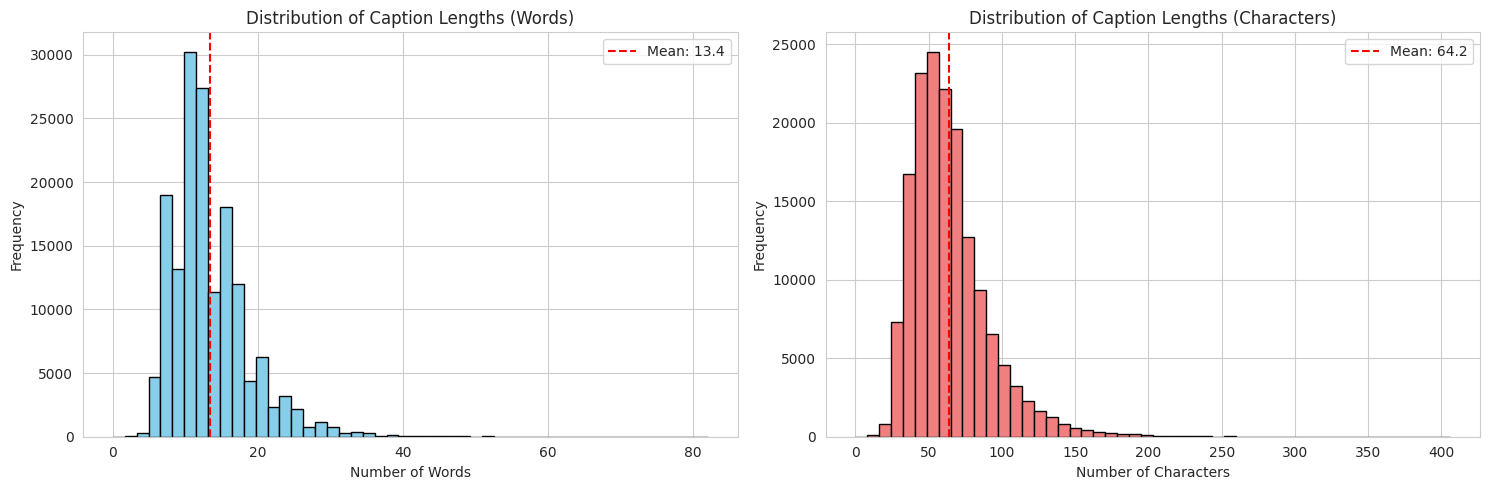

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axes[0].hist(df_captions['word_count'], bins=50, color='skyblue', edgecolor='black')
axes[0].set_xlabel('Number of Words')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Caption Lengths (Words)')
axes[0].axvline(df_captions['word_count'].mean(), color='red', linestyle='--', label=f'Mean: {df_captions["word_count"].mean():.1f}')
axes[0].legend()

axes[1].hist(df_captions['char_count'], bins=50, color='lightcoral', edgecolor='black')
axes[1].set_xlabel('Number of Characters')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Distribution of Caption Lengths (Characters)')
axes[1].axvline(df_captions['char_count'].mean(), color='red', linestyle='--', label=f'Mean: {df_captions["char_count"].mean():.1f}')
axes[1].legend()

plt.tight_layout()
plt.savefig(os.path.join(OUTPUT_PATH, 'caption_length_distribution.png'), dpi=300, bbox_inches='tight')
plt.show()

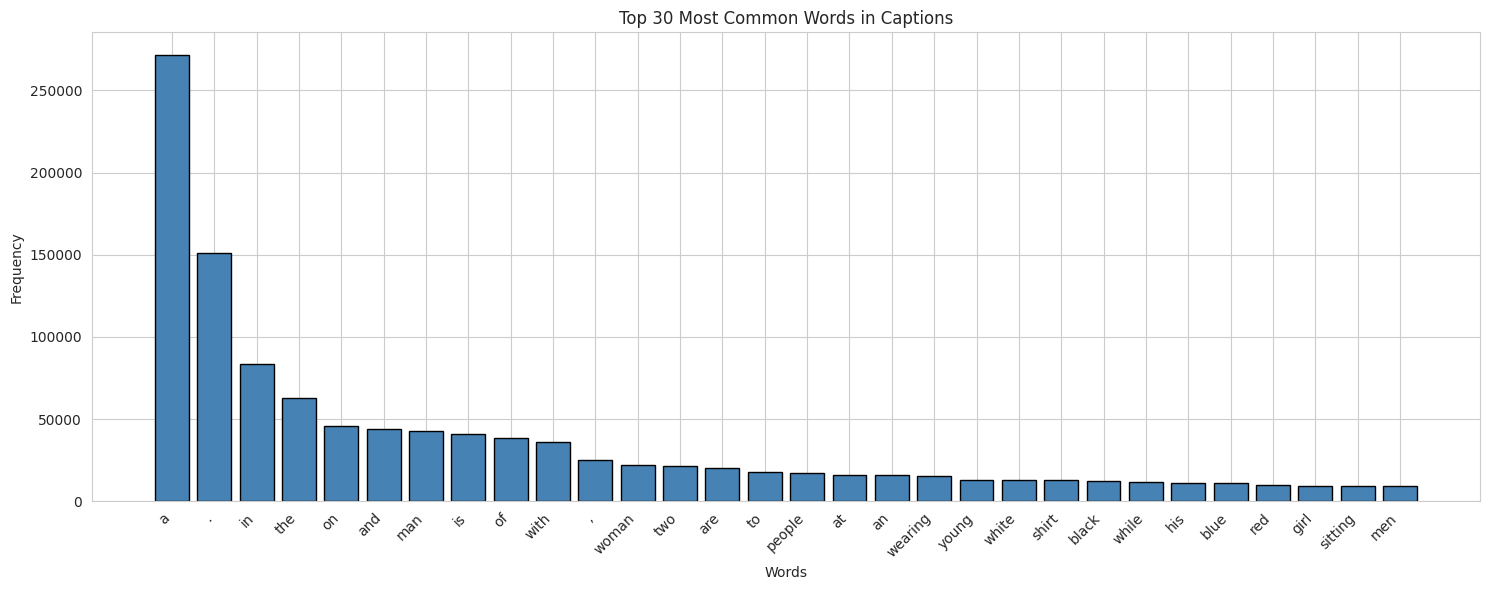

In [ ]:
top_words = word_freq.most_common(30)
words, counts = zip(*top_words)

plt.figure(figsize=(15, 6))
plt.bar(range(len(words)), counts, color='steelblue', edgecolor='black')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 30 Most Common Words in Captions')
plt.xticks(range(len(words)), words, rotation=45, ha='right')
plt.tight_layout()
plt.savefig(os.path.join(OUTPUT_PATH, 'top_words.png'), dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
image_files = set([f for f in os.listdir(IMAGES_PATH) if f.endswith(('.jpg', '.jpeg', '.png'))])
print(f"\n Total image files in folder: {len(image_files):,}")

# Check which images from captions exist
images_in_captions = set(df_captions['image'].unique())
existing_images = images_in_captions.intersection(image_files)
missing_images = images_in_captions - image_files

print(f"   Images referenced in captions: {len(images_in_captions):,}")
print(f"   Images that exist: {len(existing_images):,}")
print(f"   Missing images: {len(missing_images):,}")

if len(missing_images) > 0:
    print(f"\n  WARNING: {len(missing_images)} images are missing!")
    print(f"   First 5 missing: {list(missing_images)[:5]}")
    # Remove missing images from dataframe
    df_captions = df_captions[df_captions['image'].isin(existing_images)]
    print(f"   Removed missing images. New caption count: {len(df_captions):,}")
else:
    print(" All images exist!")


📁 Total image files in folder: 31,784
   Images referenced in captions: 31,783
   Images that exist: 31,783
   Missing images: 0
   ✓ All images exist!



📷 2949353587.jpg (Size: (500, 333)):
   1. A brown dog is chewing on a white rug whilst standing on a red carpet next to a checkered floor .
   2. A brown dog is playing with a white fluffy stuffed animal .
   3. A dark brown dog chews on something white and fluffy .
   4. A brown dog with a white covering in its mouth
   5. A dog tugs on a piece of fabric .

📷 1348113713.jpg (Size: (500, 375)):
   1. There are two small boys wearing ball caps , playing T-Ball in green grass with three adult men watching .
   2. Little boy runs the wrong way after hitting the ball in a game of tee ball .
   3. Two fathers watching a coach direct 2 young boys at playing tee ball .
   4. Three men are enjoying watching their kids run around on the grass .
   5. A man shows the child which way to run after he hits the ball .

📷 2696951725.jpg (Size: (334, 500)):
   1. A man and woman , on a park trail , pose in front of a lake and distant mountain .
   2. A man without a shirt poses with his arms spread 

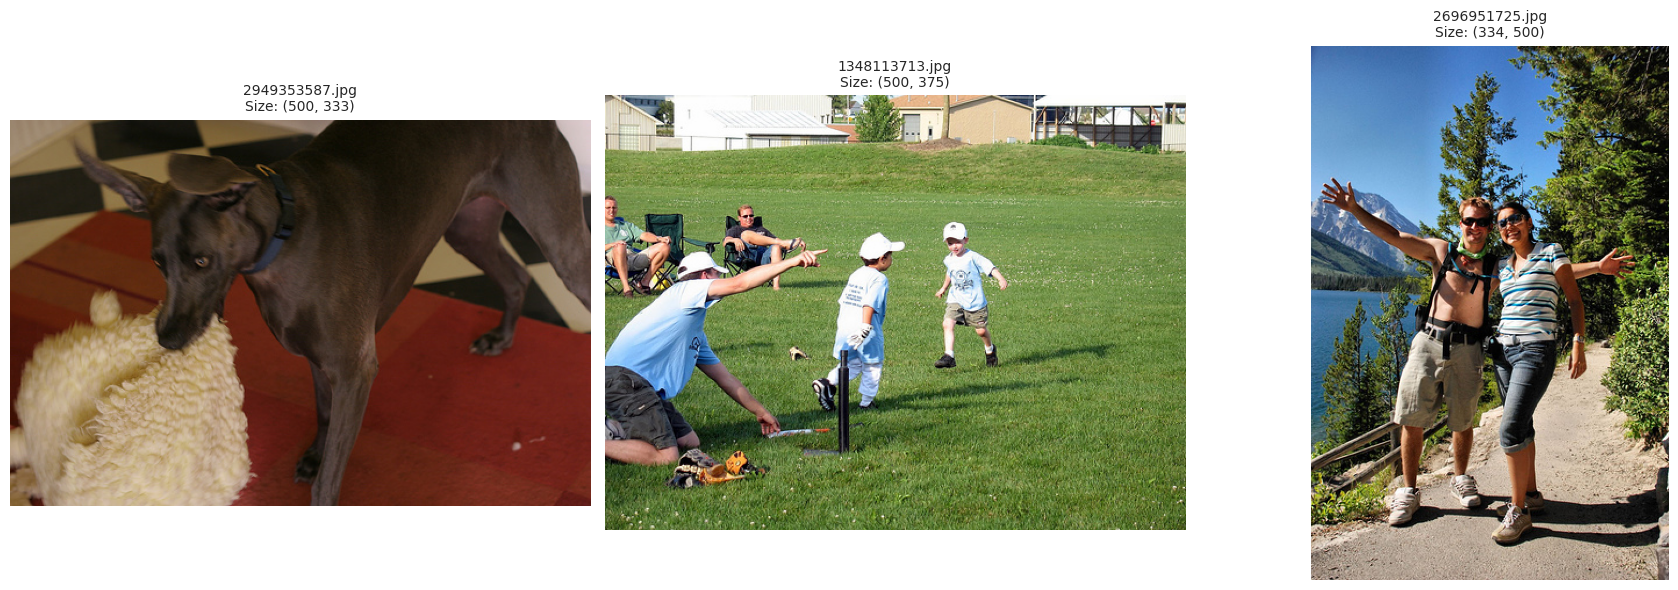

In [ ]:
sample_images = random.sample(list(existing_images), min(3, len(existing_images)))

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for idx, img_name in enumerate(sample_images):
    # Load image
    img_path = os.path.join(IMAGES_PATH, img_name)
    img = Image.open(img_path)

    # Get all captions for this image
    img_captions = df_captions[df_captions['image'] == img_name]['caption'].tolist()

    # Display image
    axes[idx].imshow(img)
    axes[idx].axis('off')
    axes[idx].set_title(f'{img_name}\nSize: {img.size}', fontsize=10)

    # Print captions below
    print(f"\n {img_name} (Size: {img.size}):")
    for i, cap in enumerate(img_captions, 1):
        print(f"   {i}. {cap}")

plt.tight_layout()
plt.savefig(os.path.join(OUTPUT_PATH, 'sample_images.png'), dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
unique_images_list = list(existing_images)
print(f"\n Total images available: {len(unique_images_list):,}")

# SUBSET FOR FASTER TRAINING
SUBSET_SIZE = 20000  # Total images to use (18k train + 1k val + 1k test)
print(f"Using subset of {SUBSET_SIZE:,} images for faster training")

# Randomly select subset
if len(unique_images_list) > SUBSET_SIZE:
    unique_images_list = random.sample(unique_images_list, SUBSET_SIZE)
    print(f"   Selected {len(unique_images_list):,} random images")

# Split strategy: 90% train, 5% val, 5% test
# First split: 90% train, 10% temp (val+test)
train_images, temp_images = train_test_split(
    unique_images_list,
    test_size=0.10,
    random_state=RANDOM_SEED
)

# Second split: split temp into 50% val, 50% test
val_images, test_images = train_test_split(
    temp_images,
    test_size=0.5,
    random_state=RANDOM_SEED
)

print(f"\n Split complete:")
print(f"   Training images: {len(train_images):,} ({len(train_images)/len(unique_images_list)*100:.1f}%)")
print(f"   Validation images: {len(val_images):,} ({len(val_images)/len(unique_images_list)*100:.1f}%)")
print(f"   Test images: {len(test_images):,} ({len(test_images)/len(unique_images_list)*100:.1f}%)")



📊 Total images available: 31,783
⚠️  Using subset of 20,000 images for faster training
   Selected 20,000 random images

✓ Split complete:
   Training images: 18,000 (90.0%)
   Validation images: 1,000 (5.0%)
   Test images: 1,000 (5.0%)


In [ ]:
train_df = df_captions[df_captions['image'].isin(train_images)].copy()
val_df = df_captions[df_captions['image'].isin(val_images)].copy()
test_df = df_captions[df_captions['image'].isin(test_images)].copy()

print(f"\n Caption counts:")
print(f"   Training captions: {len(train_df):,}")
print(f"   Validation captions: {len(val_df):,}")
print(f"   Test captions: {len(test_df):,}")


📝 Caption counts:
   Training captions: 90,000
   Validation captions: 5,000
   Test captions: 5,000


In [ ]:
train_df[['image', 'caption']].to_csv(
    os.path.join(OUTPUT_PATH, 'train_captions.csv'),
    index=False
)
val_df[['image', 'caption']].to_csv(
    os.path.join(OUTPUT_PATH, 'val_captions.csv'),
    index=False
)
test_df[['image', 'caption']].to_csv(
    os.path.join(OUTPUT_PATH, 'test_captions.csv'),
    index=False
)

print(" Saved train_captions.csv")
print(" Saved val_captions.csv")
print(" Saved test_captions.csv")

✓ Saved train_captions.csv
✓ Saved val_captions.csv
✓ Saved test_captions.csv


In [ ]:
stats = {
    'total_images': len(unique_images_list),
    'train_images': len(train_images),
    'val_images': len(val_images),
    'test_images': len(test_images),
    'train_captions': len(train_df),
    'val_captions': len(val_df),
    'test_captions': len(test_df),
    'vocabulary_size': len(vocab),
    'avg_caption_length_words': float(df_captions['word_count'].mean()),
    'avg_caption_length_chars': float(df_captions['char_count'].mean()),
    'max_caption_length_words': int(df_captions['word_count'].max()),
    'min_caption_length_words': int(df_captions['word_count'].min()),
    'random_seed': RANDOM_SEED
}

with open(os.path.join(OUTPUT_PATH, 'dataset_stats.json'), 'w') as f:
    json.dump(stats, f, indent=4)